### Tối ưu hàm số
Đầu vào:
- Hàm: $f(x, y) = \frac{x^4}{10} - \frac{2x^3}{15} - \frac{2x^2}{5}+y^2+\frac{32}{30}$
- $(x,y) \in {[lower, upper]}^2 $

Đầu ra: 
- Một lời giải $(x_i, y_i)$
- Giá trị nhỏ nhất $f_{min}(x,y)$


In [263]:
import numpy as np # type: ignore
import copy
import random
import matplotlib.pyplot as plt # type: ignore

In [264]:
class Problem:
    def __init__(self, D, LB, UB):
        self.D = D
        self.LB = LB
        self.UB = UB

In [265]:
def decode(chromosome, problem: Problem):
    x = chromosome * (problem.UB - problem.LB) + problem.LB
    return x

def get_fitness(x):
    # fx = np.sum(x**2)
    fx = x[0]**4/10 - 2*x[0]**3/15 - 2*x[0]**2/5 + x[-1]**2 + 32/30
    return -fx

In [266]:
class Individual:
    def __init__(self):
        self.chromosome = None
        self.fitness = None
        
    def gen_indi(self, problem : Problem):
        self.chromosome = np.random.uniform(0.0, 1.0, problem.D)

    def cal_fitness(self, problem : Problem):
        sol = decode(self.chromosome, problem)
        self.fitness = get_fitness(sol)
    
    def clone(self):
        return copy.deepcopy(self)
    
    def show(self):
        print(f"chromosome: {self.chromosome}")
        print(f"fitness = {self.fitness}")

In [267]:
def neighbors(indi, delta):
    list_indi = []
    neighbor = indi
    for i in range(len(indi.chromosome)):
        neighbor.chromosome[i] -= delta
        list_indi.append(neighbor.clone())
        neighbor.chromosome[i] += delta
    
    for i in range(len(indi.chromosome)):
        neighbor.chromosome[i] += delta
        list_indi.append(neighbor.clone())
        neighbor.chromosome[i] -= delta
    
    return list_indi

In [268]:
def select(list_indi, problem):
    for indi in list_indi:
        indi.cal_fitness(problem)
    return max(list_indi, key=lambda indi: indi.fitness)

In [269]:
class Population:
    def __init__(self, pop_size, problem : Problem):
        self.pop_size = pop_size
        self.problem = problem 
        self.list_indi = []

    def gen_pop(self):
        for i in range(self.pop_size):
            indi = Individual()
            indi.gen_indi(self.problem)
            indi.cal_fitness(self.problem)
            self.list_indi.append(indi)

In [270]:
def LS(problem: Problem, pop_size, max_gen, delta):
    pop = Population(pop_size, problem)
    pop.gen_pop()
    history = []
    best = Individual()
    for i in range(max_gen):
        best = max(pop.list_indi, key=lambda indi: indi.fitness)
        history.append(best.fitness)
        for i in range(len(pop.list_indi)):
            list_indi = neighbors(pop.list_indi[i], delta)
            pop.list_indi[i] = select(list_indi, problem)      
    return history, best

In [271]:
D = 2
LB = -50
UB = 50
problem = Problem(D, LB, UB)

pop_size = 10
max_gen = 500
delta = 0.001

fitness_history, solution = LS(problem, pop_size, max_gen, delta)

#show
for i in range(len(fitness_history)):
    print(f"Generation {i}, bestfitness = {fitness_history[i]:.2f}")

Generation 0, bestfitness = -1130.79
Generation 1, bestfitness = -1088.41
Generation 2, bestfitness = -1047.28
Generation 3, bestfitness = -1007.36
Generation 4, bestfitness = -968.65
Generation 5, bestfitness = -931.10
Generation 6, bestfitness = -894.71
Generation 7, bestfitness = -859.44
Generation 8, bestfitness = -825.27
Generation 9, bestfitness = -792.18
Generation 10, bestfitness = -760.14
Generation 11, bestfitness = -729.14
Generation 12, bestfitness = -699.16
Generation 13, bestfitness = -670.16
Generation 14, bestfitness = -642.13
Generation 15, bestfitness = -615.04
Generation 16, bestfitness = -588.88
Generation 17, bestfitness = -563.62
Generation 18, bestfitness = -539.25
Generation 19, bestfitness = -515.74
Generation 20, bestfitness = -493.07
Generation 21, bestfitness = -471.22
Generation 22, bestfitness = -450.17
Generation 23, bestfitness = -429.91
Generation 24, bestfitness = -410.41
Generation 25, bestfitness = -391.66
Generation 26, bestfitness = -373.63
Generat

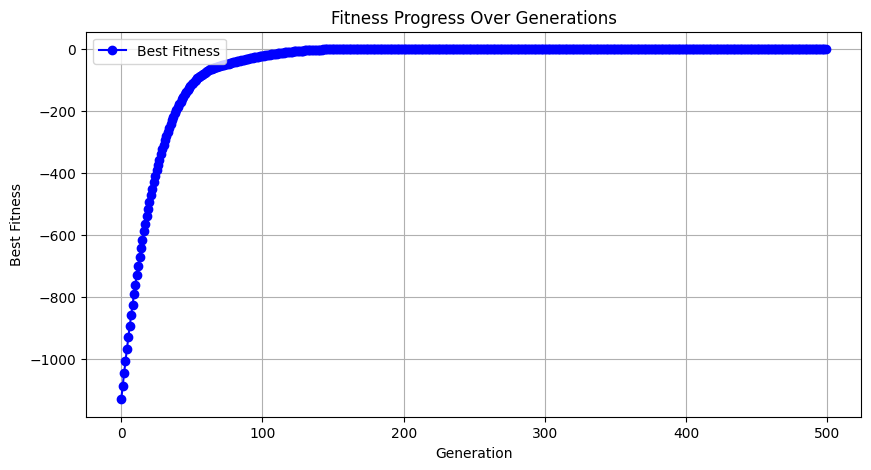

In [272]:
generations = list(range(len(fitness_history)))
plt.figure(figsize=(10, 5))
plt.plot(generations, fitness_history, marker='o', linestyle='-', color='b', label='Best Fitness')

plt.xlabel("Generation")
plt.ylabel("Best Fitness")
plt.title("Fitness Progress Over Generations")
plt.legend()
plt.grid(True)
plt.show()